In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import env

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_customer_data():
    df = pd.read_sql('SELECT * FROM properties_2017;', get_connection('zillow'))
    return df.set_index('id')

In [3]:
df = get_customer_data()

In [4]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
id,,,,,,,,,,,,,,,,,,,,,
0,10754147,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.00,"2,016.00",9.00,NaN,None,NaN,NaN
1,10759547,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"27,516.00","2,015.00","27,516.00",NaN,None,NaN,NaN
2,10843547,NaN,NaN,NaN,0.00,0.00,5.00,NaN,NaN,NaN,...,1.00,NaN,"660,680.00","1,434,941.00","2,016.00","774,261.00","20,800.37",None,NaN,NaN
3,10859147,NaN,NaN,NaN,0.00,0.00,3.00,6.00,NaN,NaN,...,1.00,NaN,"580,059.00","1,174,475.00","2,016.00","594,416.00","14,557.57",None,NaN,NaN
4,10879947,NaN,NaN,NaN,0.00,0.00,4.00,NaN,NaN,NaN,...,1.00,NaN,"196,751.00","440,101.00","2,016.00","243,350.00","5,725.17",None,NaN,NaN


In [5]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  96959818
validate observations:  41554216
test observations:  34628552


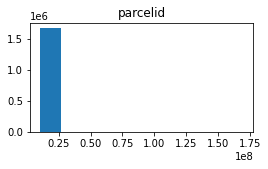

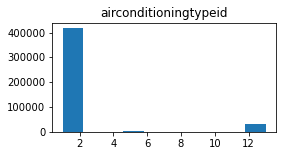

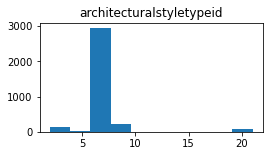

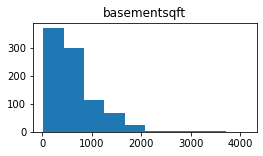

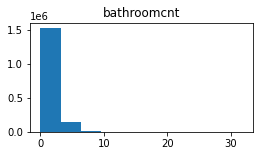

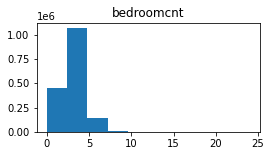

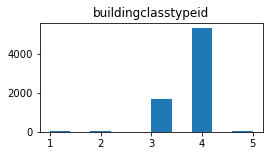

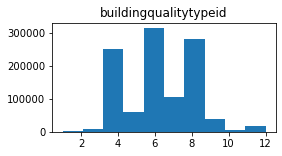

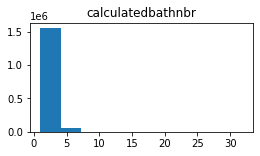

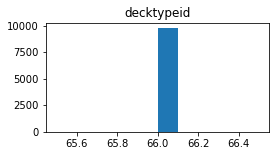

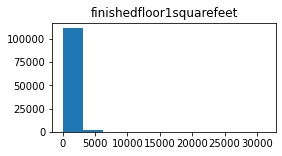

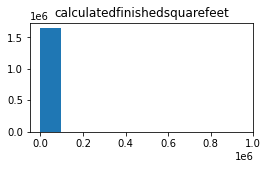

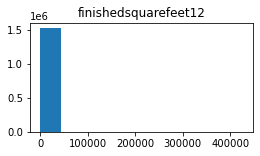

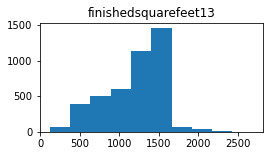

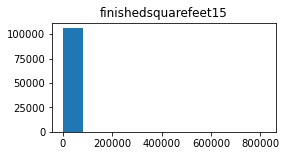

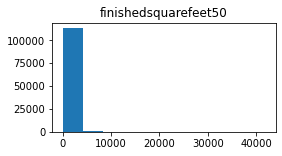

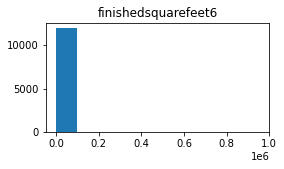

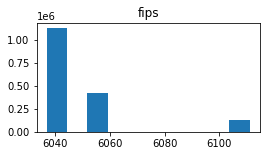

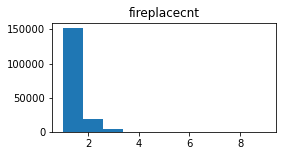

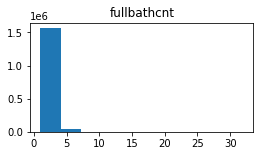

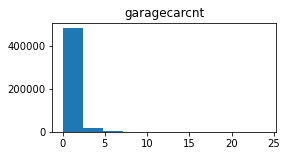

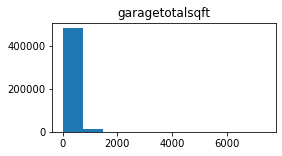

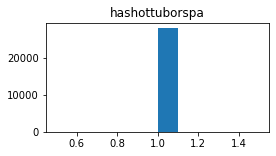

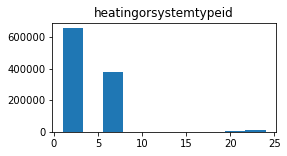

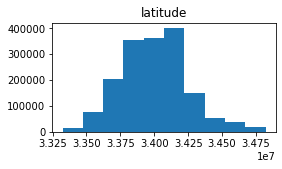

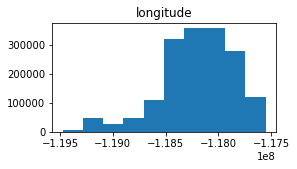

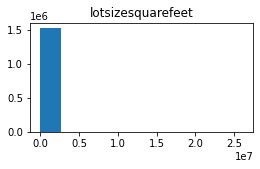

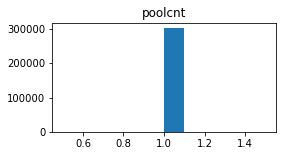

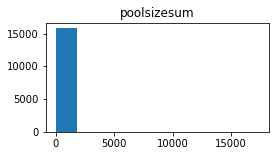

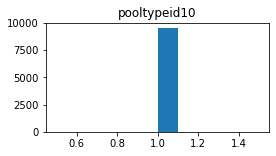

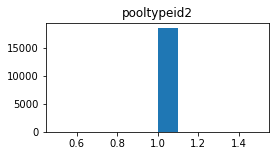

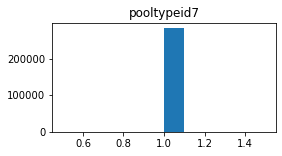

TypeError: 'value' must be an instance of str or bytes, not a None

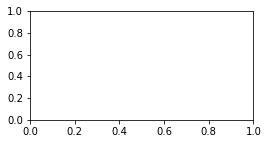

In [6]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()